In [1]:
#import libraries
##from camera import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
##import serial
import math
import time
%matplotlib inline

In [2]:
#connects arduino
##ser = serial.Serial('/dev/ttyACM0', 19200, timeout=1)

In [3]:
def start():
    

    #retakes picture when restart is set to 1
    ##if restart == 1:
        ##camera.capture('/home/pi/Desktop/currentPic' + '.jpg')    


    #reads image
    filePath = 'currentPic.jpg'
    image = img.imread(filePath,format = 'RGB')
    plt.imshow(image)


    #blurs image
    blurImage = cv2.GaussianBlur(image, (25,25),0)
    plt.imshow(blurImage)


    #converts image from RGB to HSV
    imageInHSV = cv2.cvtColor(blurImage,cv2.COLOR_RGB2HSV)


    #creates a green color range mask
    lowerLimit = (40, 27, 19)
    upperLimit = (108, 255, 180)
    greenMask = cv2.inRange(imageInHSV, lowerLimit, upperLimit)

    isGreen = greenMask > 0
    greenOnly = np.zeros_like(blurImage, np.uint8)
    greenOnly[isGreen] = blurImage[isGreen]
    plt.imshow(greenOnly)


    #identifies if there is a potential leaf
    blackImage = np.zeros_like(isGreen)
    percentGreen = math.sqrt(np.mean(blackImage != isGreen))


    #finds potential leaf's coordinates within picture
    sumRows = np.sum(isGreen, axis=1)
    sumColumns = np.sum(isGreen.T, axis=1)

    index = 0
    longestRow = 0
    longestIndexRow = 0
    for row in sumRows:
        if row > longestRow:
            longestRow = row
            longestIndexRow = index
        index = index + 1
        
    index = 0
    longestColumn = 0
    longestIndexColumn = 0
    for column in sumColumns:
        
        if column > longestColumn:
            longestColumn = column
            longestIndexColumn = index
        index = index + 1

    print(f'Pixel coordinates for the center of the potential leaf: ({longestIndexRow}, {longestIndexColumn})')
    
    
    #finds the direction that the arm needs to move to grab leaf
    pixelToDegree = 65/1024
    centerColumn = 1024/2
    direction = np.abs(longestIndexColumn - centerColumn) * pixelToDegree


    #finds the distance that the car needs to move to face leaf
    inchesToLeaf = longestIndexRow * (22.5/768)
    inchesToLeaf = inchesToLeaf - 6

    
    if percentGreen > 0.1 and longestIndexRow > 768/2:
        
        #isLeaf shape check
        #...
        #returns
        isLeaf = True #TESTING
        #or 
        isLeaf = False #TESTING

        if isLeaf == True:

            if centerColumn > longestIndexColumn:
                direction = direction + 32.5
                print(f'Turn {round(direction, 2)} degrees to the left to grab the leaf')
            else:
                print(f'Turn {round(direction, 2)} degrees to the right to grab the leaf')

            print(f'The leaf is {round(inchesToLeaf, 2)} inches away')
            
    else:
        isLeaf = False
        inchesToLeaf = 0
        print('There is no leaf within range')
        
    isLeaf = True #REMOVE AFTER TESTING
    return(isLeaf, inchesToLeaf)

Pixel coordinates for the center of the potential leaf: (674, 404)
True
13.74609375
done


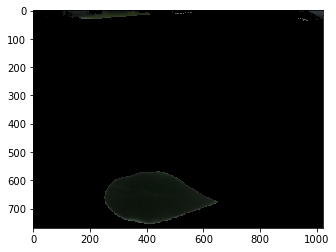

In [4]:
try:
    K = False
    while K == False:
        restart = 1
        K, I = start()
        ##...
        print(K)
        print(I)
finally:
    print('done')